# Autor: Íñigo Ruiz Martínez
# Fecha: 09/11/2022
# Asunto: Práctica módulo Python Avanzado: esperanza de vida frente a renta per cápita por países

### En primer lugar importo las librerías de matplotlib y pandas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### A continuación leo el archivo 'Info_pais.csv' contenido en la carpeta 'datasets', utilizando 'ISO-8859-1' para conseguir una codificación estándar para evitar problemas si el dataframe tuviera carácteres especiales, indicando que el delimitador es el punto y coma, y que los decimales vienen marcados por la coma

In [ ]:
df = pd.read_csv(
    r'datasets/Info_pais.csv',
    encoding='ISO-8859-1',
    delimiter=';',
    decimal=','
)

### Exploro los datos con la función 'head' que nos muestra por defecto las 5 primeras filas del dataframe

In [ ]:
df.head()

,País,Poblacion,Renta per capita,Esperanza de vida
0,United States,325084756,59939,78.9
1,China,1421021791,8612,76.7
2,Japan,127502725,38214,84.5
3,Germany,82658409,44680,81.2
4,India,1338676785,1980,69.4


### Creo un nuevo dataframe con los datos de la columna población ordenados descendentemente, y lo exploro

In [ ]:
df_order = df.sort_values(
    'Poblacion',
    ascending=False
)

df_order.head(15)

,País,Poblacion,Renta per capita,Esperanza de vida
1,China,1421021791,8612,76.7
4,India,1338676785,1980,69.4
0,United States,325084756,59939,78.9
15,Indonesia,264650963,3837,71.5
38,Pakistan,207906209,1467,67.1
7,Brazil,207833823,9881,75.7
28,Nigeria,190873244,1969,54.3
41,Bangladesh,159685424,1564,72.3
10,Russia,145530082,10846,72.4
2,Japan,127502725,38214,84.5


### Utilizo la función scatter de la librería matplotlib para generar un gráfico en el que represento la Renta per Capita en el eje X y la Esperanza de Vida en el eje Y

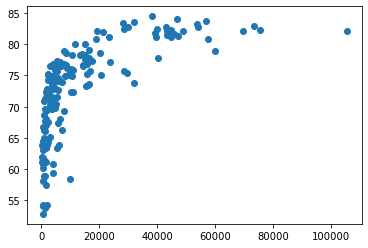

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida']
);

### Añado etiquetas tanto al eje X como al eje Y, y pongo un título al gráfico

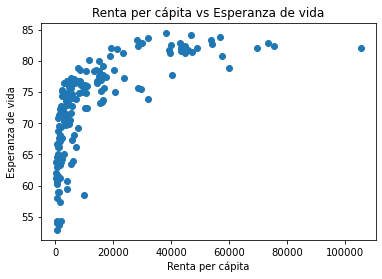

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida');

### Creo una nueva columna de población normalizada, para escalar la población de cada país frente al máximo de población de todo el conjunto de países. Y dividiendo entre 10000 evito que los países con más población inunden el gráfico

In [ ]:
df_order['Poblacion_normalizada'] = df_order['Poblacion'] / (max(df_order['Poblacion'])/10000)
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Poblacion_normalizada
1,China,1421021791,8612,76.7,10000.000000
4,India,1338676785,1980,69.4,9420.522567
0,United States,325084756,59939,78.9,2287.683117
15,Indonesia,264650963,3837,71.5,1862.399047
38,Pakistan,207906209,1467,67.1,1463.075446


### Añado el atributo s (size) para que cada bola tenga un tamaño diferente en base a la población normalizada

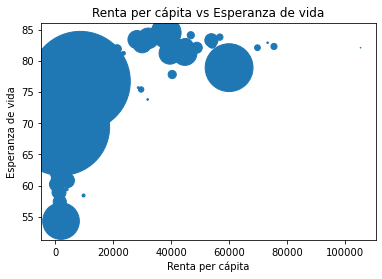

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida');

### Amplio el tamaño del gráfico para que las bolas más grandes no inunden el gráfico y se vean más expandidas

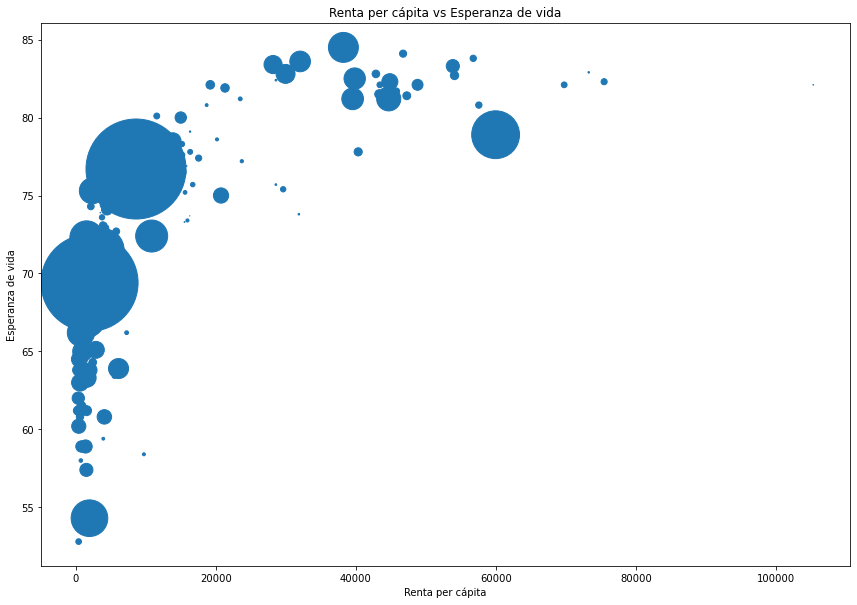

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5, 10);

### Modifico el color con el atributo c (colour) para modificar los colores de las bolas también en función de la nueva columna que he creado de la población normalizada

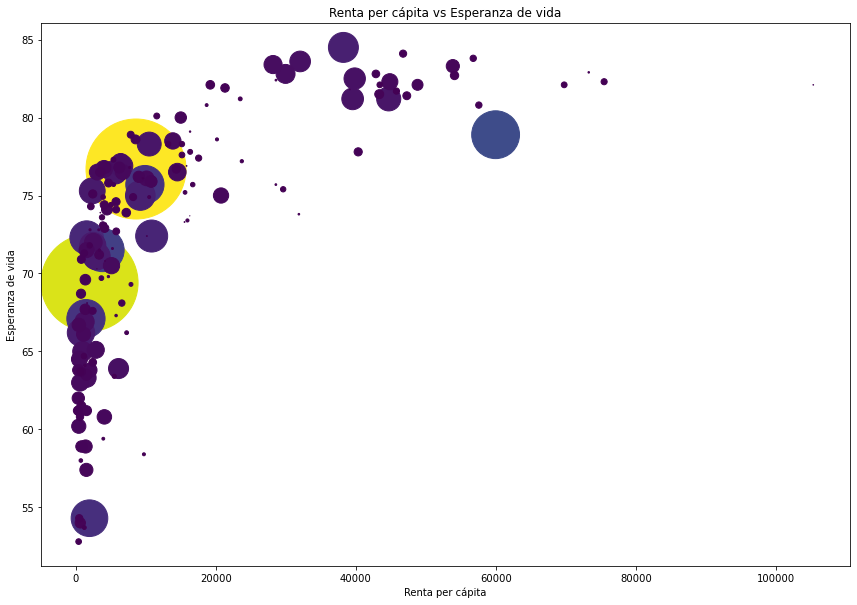

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5, 10);

### Reseteo los índices de nuestro dataframe con la función reset_index. Y a continuación añado etiquetas a las 10 bolas más grandes al lado de su bola representativa para identificarlas y ayudar a la interpretación del gráfico, y de estar forma evitar que las etiquetas figuren para todos los países y se produzca una inundación con este texto

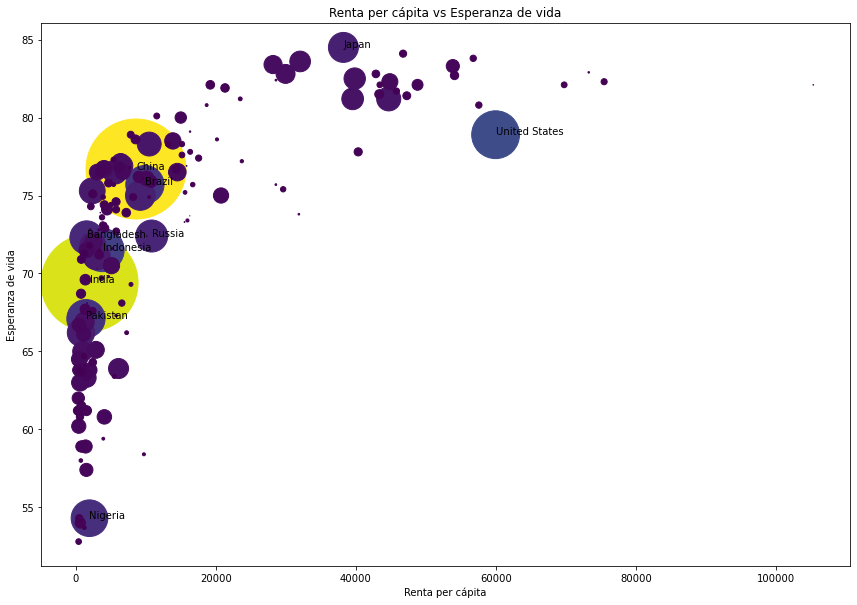

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5, 10);

df_order.reset_index(drop=True, inplace=True)

for i in range(0, 10):
    plt.annotate(
        df_order['País'][i],
        (df_order['Renta per capita'][i], df_order['Esperanza de vida'][i])
    )

### Para poder ver las bolas que están ocultas por detrás por aquellas más grandes, añado transparencia a las bolas. Además ayudo a que las etiquetas se vean de forma más clara

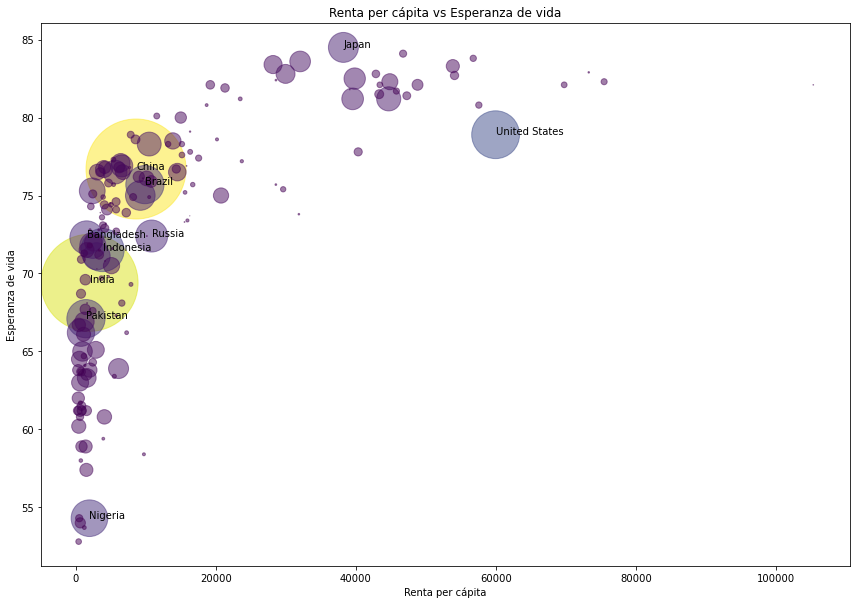

In [ ]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada'],
    alpha=0.5
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5, 10);

df_order.reset_index(drop=True, inplace=True)

for i in range(0, 10):
    plt.annotate(
        df_order['País'][i],
        (df_order['Renta per capita'][i], df_order['Esperanza de vida'][i])
    )

## Conclusión final

Haciendo un detenido estudio de los datos y el gráfico final que he generado, puedo sacar la conclusión de que la renta per cápita está directamente relacionada con la esperanza de vida. Puedo ver que países como Japón y Estados Unidos que están etiquetados en el gráfico, por encontrarse entre los diez con mayor población normalizada, tienen una renta per cápita muy alta y una esperanza de vida cercana o incluso superior a los 80 años. Mientras que Nigeria o incluso Pakistan poseen una renta per cápita mucho menor y su esperanza de vida también es significativamente inferior.
Esto tiene mucho sentido, puesto que los países con una renta per cápita más alta tendrán un desarrollo socioeconómico, educativo y sanitario más grande, ligado a una calidad de vida mayor, teniendo acceso a tratamientos y servicios a los que los paises "más pobres" no pueden optar.
Además, ampliando el tamaño del gráfico y añadiendo etiquetas a los 25 primeros países en población normalizada (en vez de a sólo 10) puedo apreciar otros países como Reino Unido, Francia, Alemania, España, Corea del Sur o Italia que confirman esto, ya que su renta per cápita es de las más altas y su esperanza de vida también. Y en lado contrario otros como Sudáfrica, Tanzania o Etiopía con unas renta per cápita más pequeñas y menor esperanza de vida.

Cabe destacar que me parece también de interés el hecho de poder observar mediante el gráfico comportamientos que podrían considerarse fuera de lo normal, como podría ser que países como China o Brasil sin llegar a tener una renta per cápita de las mayores poseen una notable marca de esperanza de vida media en su población, que quizá podemos atribuir al estilo de vida o genética de sus habitantes.